In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as so

dataset = pd.read_csv("train.csv")
test_dataset = pd.read_csv("test.csv")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Searching for Duplicates in the data, but specifically using an ID column, so the 'Name' column was chosen instead of the 'PassengerId' because its the closest thing to identification next to a unique set of characters.

In [4]:
def find_duplicate_names(dataset, column_name):
    # Check if the column_name exists in the DataFrame
    if column_name not in dataset.columns:
        return "Column not found in DataFrame"
    
    # Create a new DataFrame with just the specified column
    names_series = dataset['Name']
    
    # Use value_counts to count the occurrences of each name
    name_counts = names_series.value_counts()
    
    # Filter names that have counts greater than 1 (i.e., duplicates)
    duplicate_names = name_counts[name_counts > 1].index.tolist()
    
    return duplicate_names

# Example usage:
# Assuming you have a DataFrame called 'df' with a 'Name' column
duplicate_names = find_duplicate_names(dataset, "Name")
print(duplicate_names)

['Gollux Reedall', 'Elaney Webstephrey', 'Grake Porki', 'Sus Coolez', 'Apix Wala', 'Sharie Gallenry', 'Cuses Pread', 'Alraium Disivering', 'Carry Contrevins', 'Keitha Josey', 'Glenna Valezaley', 'Dia Cartez', 'Loree Wolfernan', 'Gwendy Sykess', 'Asch Stradick', 'Troya Schwardson', 'Glena Hahnstonsen', 'Anton Woody', 'Juane Popelazquez', 'Ankalik Nateansive']


The values appeared and its time to inspect and see which record would be most useful for the training model. Notice that the age is different and by a value of 1. Now what is truly meaningful in my opinion for this test is that we should look at the target, 'HomePlanet', 'Cabin', 'Destination' and the money spent during the trip. Then we drop the unfavorable record. I used SQL to help me see all the data and choose the combination for dropping duplicates from there.

In [5]:
print(dataset[dataset['Name'] == 'Elaney Webstephrey'])

    PassengerId HomePlanet CryoSleep    Cabin  Destination   Age    VIP  \
156     0179_01      Earth     False   G/26/P  TRAPPIST-1e  19.0  False   
956     1018_01      Earth      True  G/150/P  TRAPPIST-1e  18.0  False   

     RoomService  FoodCourt  ShoppingMall  Spa  VRDeck                Name  \
156          1.0      219.0         673.0  2.0    11.0  Elaney Webstephrey   
956          0.0        0.0           0.0  0.0     0.0  Elaney Webstephrey   

     Transported  
156         True  
956         True  


In [6]:
test_dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [7]:
duplicate_names = find_duplicate_names(test_dataset, "Name")
print(duplicate_names)

['Cints Erle', 'Evendy Buchansen', 'Berta Barnolderg', 'Cocors Cola', 'Lyney Sellahaney', 'Con Pashe', 'Chrey Colte']


In [8]:
print(test_dataset[test_dataset['Name'] == 'Cints Erle'])

     PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
1445     3101_01       Mars     False   D/104/S  TRAPPIST-1e  73.0  False   
2995     6576_01       Mars      True  F/1368/P  TRAPPIST-1e  20.0  False   

      RoomService  FoodCourt  ShoppingMall  Spa  VRDeck        Name  
1445       1858.0        0.0         382.0  8.0   329.0  Cints Erle  
2995          0.0        0.0           0.0  0.0     0.0  Cints Erle  


<Axes: xlabel='VIP', ylabel='count'>

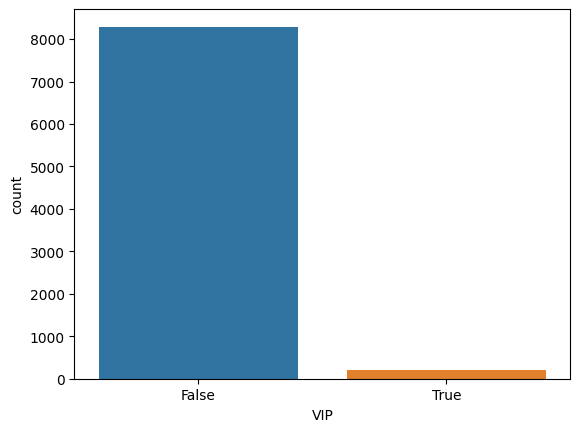

In [9]:
sns.countplot(dataset, x='VIP')

The 'VIP' feature is not going to be too useful to us since 90% or more, is False so we may need to drop it because it wont affect the target, but we will see through the heat map to make sure.

<Axes: xlabel='Transported', ylabel='count'>

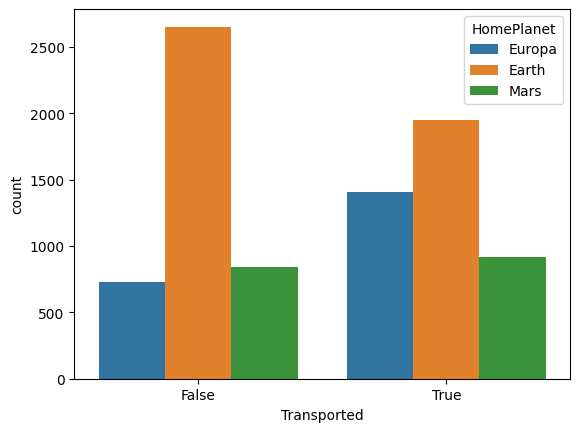

In [10]:
sns.countplot(dataset, x='Transported', hue='HomePlanet')

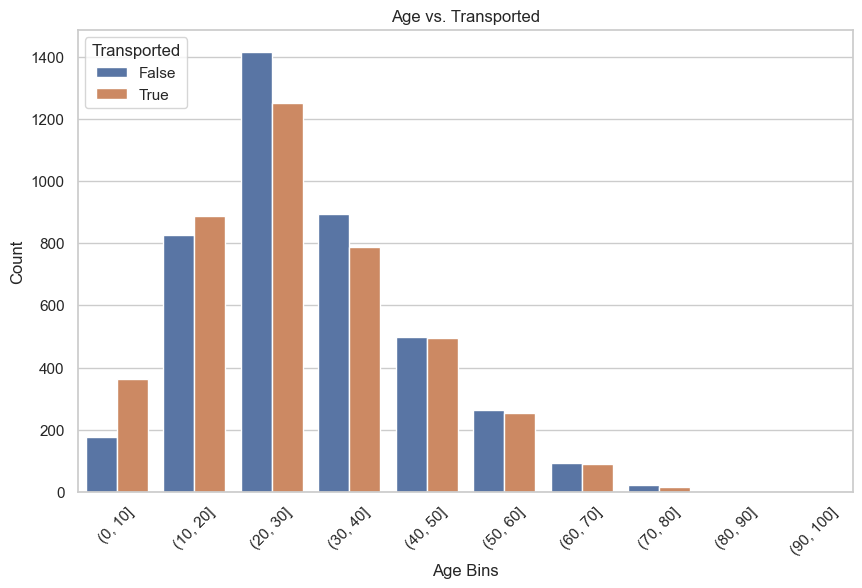

In [11]:
import matplotlib.pyplot as plt

#the age is a numeric column, so we create bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Create a countplot or bar plot with age bins
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use sns.countplot to create a countplot with age bins
sns.countplot(data=dataset, x=pd.cut(dataset['Age'], bins=age_bins), hue='Transported')

# Set labels and title
plt.xlabel("Age Bins")
plt.ylabel("Count")
plt.title("Age vs. Transported")

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<Axes: xlabel='CryoSleep', ylabel='count'>

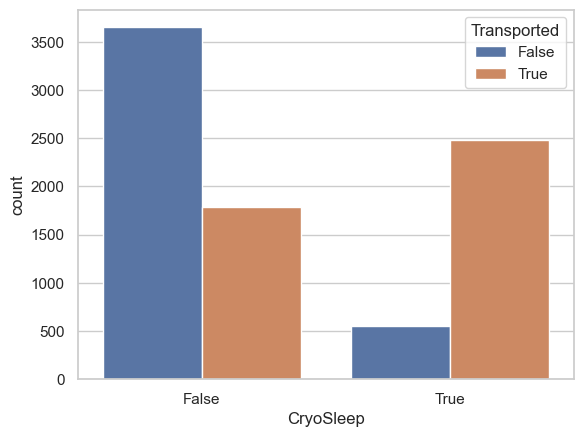

In [12]:
sns.countplot(dataset, x='CryoSleep', hue='Transported')

<Axes: xlabel='Transported', ylabel='count'>

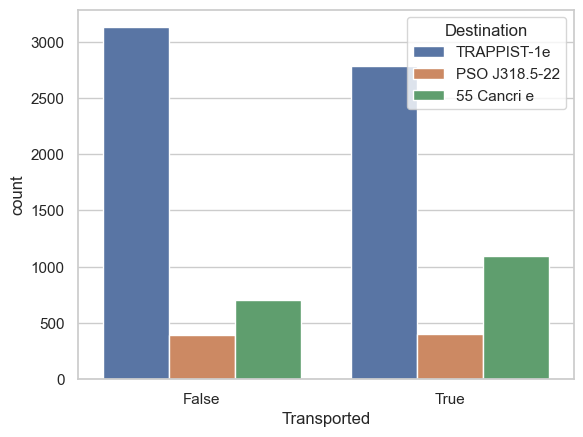

In [13]:
sns.countplot(dataset, x='Transported', hue='Destination')

I did a SQL query to see based on the fact that Trappist is the most successful destination to get to, I checked the values according to each home planet.

As it stands with the values obtained using SQL query, the odds are structured this way. Earth people have 53.79%, Mars 25.58% and Europa 20.62% to get transported.

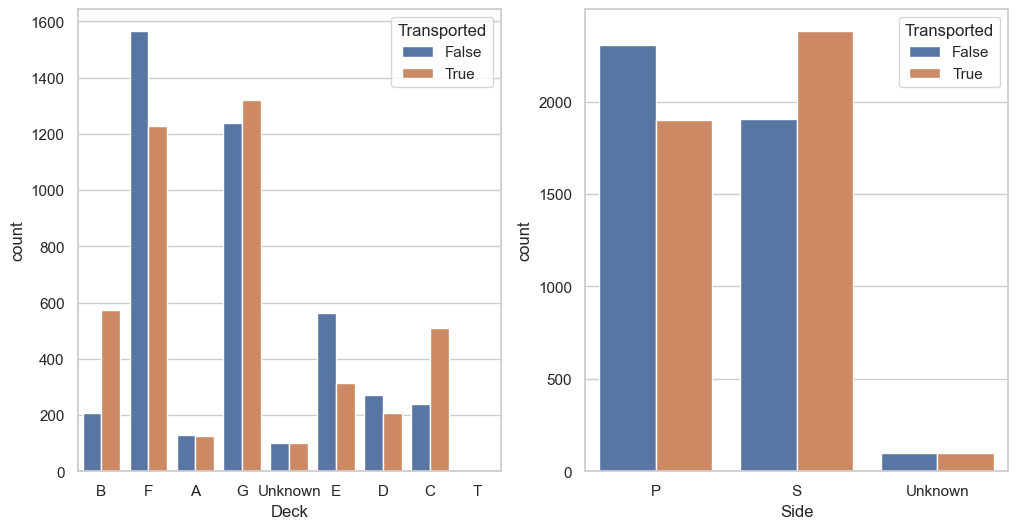

In [14]:
#Cabin' column

# Extract 'Deck' and 'Side' information
dataset['Deck'] = dataset['Cabin'].str.extract(r'([A-Z]+)').fillna('Unknown')
dataset['Side'] = dataset['Cabin'].str.extract(r'([PS])').fillna('Unknown')

# Create countplots for 'Deck' and 'Side' vs. 'Transported'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(data=dataset, x='Deck', hue='Transported')
plt.subplot(1, 2, 2)
sns.countplot(data=dataset, x='Side', hue='Transported')
plt.show()

Looking at it realistically, only people with a cabin are genuinely part of the crew since it is booked and the ticket secures a place to occupy. Therefore the unknowns need to be removed. The observation shows that people on Deck G and people on the Side S were most likely transported, which will help in our training. I choose to do Onehot encoding for the feature of the Side and will not use the Deck since it will need more compute power by adding too many features.

In [15]:
dataset.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [16]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Transported' column
dataset['Transported_encoded'] = label_encoder.fit_transform(dataset['Transported'])

#Create a dictionary to map the encoded values back to their original labels
encoded_labels = label_encoder.classes_
label_mapping = {index: label for index, label in enumerate(encoded_labels)}

# Print the mapping
print(label_mapping)

# Now, the 'Transported_encoded' column contains numerical labels

{0: False, 1: True}


In [17]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Transported_encoded
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1


<Axes: >

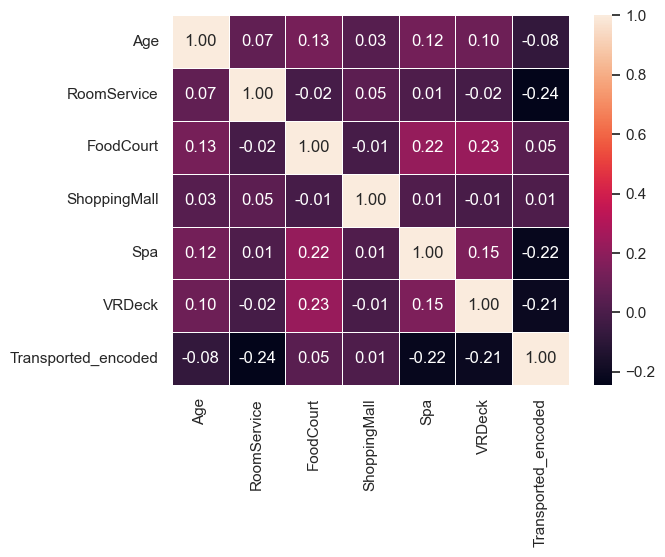

In [18]:
#Create a heatmap to see correlation by having stored all the numeric columns
numeric_dataset = dataset.select_dtypes(include='number')

sns.heatmap(numeric_dataset.corr(), annot=True, fmt=".2f", linewidths=0.5)

In [59]:
from sklearn.preprocessing import OneHotEncoder

# Extract the 'Side' part from the 'Cabin' values
dataset['Side'] = dataset['Cabin'].str.extract(r'([PS])')


# One-hot encode the 'Side' feature
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(dataset[['Side']])


# Create a DataFrame with the one-hot encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(input_features=['Side']))


# Concatenate the one-hot encoded DataFrame with the original DataFrame
df = pd.concat([dataset, encoded_df], axis=1)

#display results
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Transported_encoded,Side_P,Side_S,Side_nan
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0,1.0,0.0,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,1,0.0,1.0,0.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0,0.0,1.0,0.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0,0.0,1.0,0.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1,0.0,1.0,0.0


In [60]:
test_dataset['Side'] = test_dataset['Cabin'].str.extract(r'([PS])')

encoded_features = encoder.fit_transform(test_dataset[['Side']])

test_encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(input_features=['Side']))

t_df = pd.concat([test_dataset, test_encoded_df], axis=1)

t_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Side,Side_P,Side_S,Side_nan
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S,0.0,1.0,0.0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S,0.0,1.0,0.0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S,0.0,1.0,0.0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S,0.0,1.0,0.0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S,0.0,1.0,0.0


New features created based on the Cabin column. Next is to do feature engineering before running it through the transformation pipeline below.

In [20]:
# Create age bins (you can adjust the bin edges as needed)
age_bins_new = [0, 20, 30, 40, 50, 60, 100] #define age bins
age_labels = ['0-20', '20-30', '30-40', '40-50', '50-60', '60+']  # Define age bin labels

# Create a new column 'AgeGroup' based on age bins
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins_new, labels=age_labels, include_lowest=True)

# Initialize a LabelEncoder for age groups
label_encoder = LabelEncoder()

# Encode 'AgeGroup' into numerical values
df['AgeGroup_encoded'] = label_encoder.fit_transform(df['AgeGroup'])

In [21]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Side,Transported_encoded,Side_P,Side_S,Side_nan,AgeGroup,AgeGroup_encoded
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P,0,1.0,0.0,0.0,30-40,2
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S,1,0.0,1.0,0.0,20-30,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S,0,0.0,1.0,0.0,50-60,4
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S,0,0.0,1.0,0.0,30-40,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S,1,0.0,1.0,0.0,0-20,0


In [62]:
# Create a new column 'AgeGroup' based on age bins
t_df['AgeGroup'] = pd.cut(t_df['Age'], bins=age_bins_new, labels=age_labels, include_lowest=True)

# Initialize a LabelEncoder for age groups
label_encoder = LabelEncoder()

# Encode 'AgeGroup' into numerical values
t_df['AgeGroup_encoded'] = label_encoder.fit_transform(t_df['AgeGroup'])

t_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Side,Side_P,Side_S,Side_nan,AgeGroup,AgeGroup_encoded
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,S,0.0,1.0,0.0,20-30,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,S,0.0,1.0,0.0,0-20,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,S,0.0,1.0,0.0,30-40,2
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,S,0.0,1.0,0.0,30-40,2
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,S,0.0,1.0,0.0,0-20,0


In [22]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'CryoSleep' column
df['CryoSleep_encoded'] = label_encoder.fit_transform(df['CryoSleep'])

#Create a dictionary to map the encoded values back to their original labels
encoded_labels = label_encoder.classes_
label_mapping = {index: label for index, label in enumerate(encoded_labels)}

# Print the mapping
print(label_mapping)

# Now, the 'CryoSleep_encoded' column contains numerical labels

{0: False, 1: True, 2: nan}


In [63]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'CryoSleep' column
t_df['CryoSleep_encoded'] = label_encoder.fit_transform(t_df['CryoSleep'])

#Create a dictionary to map the encoded values back to their original labels
test_encoded_labels = label_encoder.classes_
test_label_mapping = {index: label for index, label in enumerate(test_encoded_labels)}

# Print the mapping
print(test_label_mapping)

# Now, the 'CryoSleep_encoded' column contains numerical labels

{0: False, 1: True}


<Axes: >

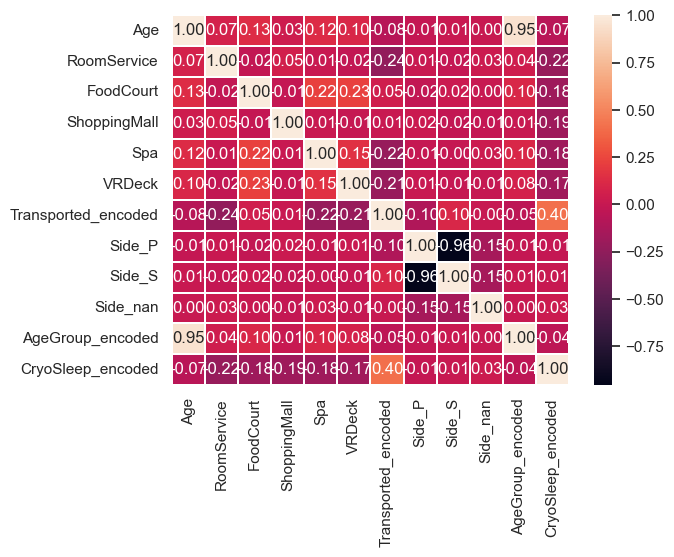

In [23]:
#Create a heatmap to see correlation by having stored all the numeric columns
numeric_dataset = df.select_dtypes(include='number')

sns.heatmap(numeric_dataset.corr(), annot=True, fmt=".2f", linewidths=0.3)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   PassengerId          8693 non-null   object  
 1   HomePlanet           8492 non-null   object  
 2   CryoSleep            8476 non-null   object  
 3   Cabin                8494 non-null   object  
 4   Destination          8511 non-null   object  
 5   Age                  8514 non-null   float64 
 6   VIP                  8490 non-null   object  
 7   RoomService          8512 non-null   float64 
 8   FoodCourt            8510 non-null   float64 
 9   ShoppingMall         8485 non-null   float64 
 10  Spa                  8510 non-null   float64 
 11  VRDeck               8505 non-null   float64 
 12  Name                 8493 non-null   object  
 13  Transported          8693 non-null   bool    
 14  Deck                 8693 non-null   object  
 15  Side                 

In [25]:
numerical_features = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
categorical_features = ["HomePlanet", "CryoSleep", "Destination"]

In [26]:
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

class NumericalImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X[numerical_features]= imputer.fit_transform(X[numerical_features])
        return X

In [27]:
class categoricalImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        imputer = SimpleImputer(strategy="most_frequent")
        X[categorical_features]= imputer.fit_transform(X[categorical_features])
        return X

In [28]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(["ShoppingMall", "FoodCourt", "VIP", "Name", "Transported_encoded", "Deck", "Side_nan", "Side", "AgeGroup",
                      "Cabin", "PassengerId", "CryoSleep"], axis=1, errors="ignore")

In [29]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("NumericalImputer", NumericalImputer()),
                     ("categoricalImputer", categoricalImputer()),
                    ("FeatureDropper", FeatureDropper())])

In [30]:
processed_train_data = pipeline.fit_transform(df)

In [66]:
processed_test_data = pipeline.fit_transform(t_df)

In [31]:
processed_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         8693 non-null   object 
 1   Destination        8693 non-null   object 
 2   Age                8693 non-null   float64
 3   RoomService        8693 non-null   float64
 4   Spa                8693 non-null   float64
 5   VRDeck             8693 non-null   float64
 6   Transported        8693 non-null   bool   
 7   Side_P             8693 non-null   float64
 8   Side_S             8693 non-null   float64
 9   AgeGroup_encoded   8693 non-null   int32  
 10  CryoSleep_encoded  8693 non-null   int32  
dtypes: bool(1), float64(6), int32(2), object(2)
memory usage: 619.8+ KB


In [67]:
processed_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   HomePlanet         4277 non-null   object 
 1   Destination        4277 non-null   object 
 2   Age                4277 non-null   float64
 3   RoomService        4277 non-null   float64
 4   Spa                4277 non-null   float64
 5   VRDeck             4277 non-null   float64
 6   Side_P             4277 non-null   float64
 7   Side_S             4277 non-null   float64
 8   AgeGroup_encoded   4277 non-null   int32  
 9   CryoSleep_encoded  4277 non-null   int32  
dtypes: float64(6), int32(2), object(2)
memory usage: 300.9+ KB


In [33]:
from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        encoder = OneHotEncoder()
        matrix = encoder.fit_transform(X[['HomePlanet']]).toarray()
        
        column_names = ['Earth', 'Europa', 'Mars']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]

        matrix = encoder.fit_transform(X[['Destination']]).toarray()
        
        column_names = ['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
        
        for i in range(len(matrix.T)):
            X[column_names[i]] = matrix.T[i]
        return X

In [34]:
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X.drop(['HomePlanet', 'Destination'], axis=1, errors="ignore")

In [35]:
encoder_pipeline = Pipeline([("featureEncoder", FeatureEncoder()),
                            ("FeatureDropper", FeatureDropper())])

In [36]:
final_train_set = encoder_pipeline.fit_transform(processed_train_data)

In [68]:
final_test_set = encoder_pipeline.fit_transform(processed_test_data)

In [69]:
final_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                4277 non-null   float64
 1   RoomService        4277 non-null   float64
 2   Spa                4277 non-null   float64
 3   VRDeck             4277 non-null   float64
 4   Side_P             4277 non-null   float64
 5   Side_S             4277 non-null   float64
 6   AgeGroup_encoded   4277 non-null   int32  
 7   CryoSleep_encoded  4277 non-null   int32  
 8   Earth              4277 non-null   float64
 9   Europa             4277 non-null   float64
 10  Mars               4277 non-null   float64
 11  TRAPPIST-1e        4277 non-null   float64
 12  55 Cancri e        4277 non-null   float64
 13  PSO J318.5-22      4277 non-null   float64
dtypes: float64(12), int32(2)
memory usage: 434.5 KB


In [38]:
final_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                8693 non-null   float64
 1   RoomService        8693 non-null   float64
 2   Spa                8693 non-null   float64
 3   VRDeck             8693 non-null   float64
 4   Transported        8693 non-null   bool   
 5   Side_P             8693 non-null   float64
 6   Side_S             8693 non-null   float64
 7   AgeGroup_encoded   8693 non-null   int32  
 8   CryoSleep_encoded  8693 non-null   int32  
 9   Earth              8693 non-null   float64
 10  Europa             8693 non-null   float64
 11  Mars               8693 non-null   float64
 12  TRAPPIST-1e        8693 non-null   float64
 13  55 Cancri e        8693 non-null   float64
 14  PSO J318.5-22      8693 non-null   float64
dtypes: bool(1), float64(12), int32(2)
memory usage: 891.5 KB


In [39]:
#Begin Model selection
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score

#split the features
X = final_train_set.drop('Transported', axis=1)
y = final_train_set['Transported']

#split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
#make the XGboost model
xg_model = xgb.XGBClassifier()

#Train the model using the training data
xg_model.fit(X_train, y_train)

y_val_prediction = xg_model.predict(X_val)
accuracy = accuracy_score(y_val, y_val_prediction)
precision = precision_score(y_val, y_val_prediction)

print("Validation Accuracy:", accuracy)
print("Validation Precision:", precision)

Validation Accuracy: 0.7734330074755607
Validation Precision: 0.7613390928725702


In [41]:
#Let's evaluate other metrics and which feature the model relied on the most for predictions

from sklearn.metrics import recall_score, f1_score

# Calculate precision
precision = precision_score(y_val, y_val_prediction)

# Calculate recall
recall = recall_score(y_val, y_val_prediction)

# Calculate F1-score
f1 = f1_score(y_val, y_val_prediction)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7613390928725702
Recall: 0.8029612756264237
F1-score: 0.7815964523281597


Precision is approximately 0.7613, which means that about 76.13% of the positive predictions made by the model are correct.
Recall is approximately 0.8029, indicating that the model can capture about 80.29% of the actual positive cases.
The F1-score is approximately 0.7816, providing a balanced measure of precision and recal

TRAINING SESSION: There is a good balance between the Precision and Recall, enabling the model to perform reasonably well.l.

<Figure size 1000x600 with 0 Axes>

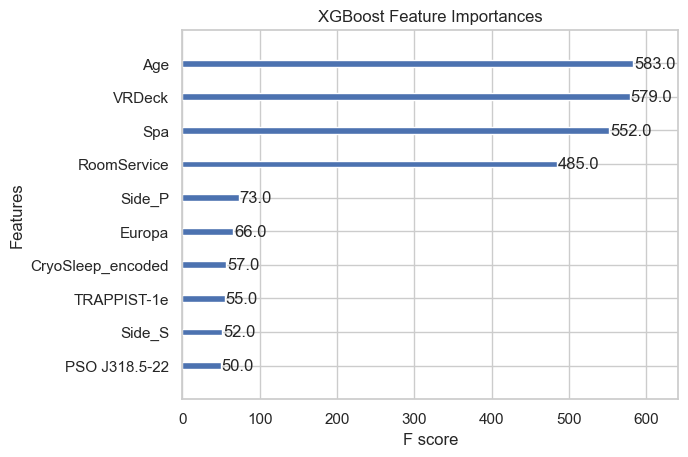

In [42]:
# Plot feature importances
plt.figure(figsize=(10, 6))
xgb.plot_importance(xg_model, importance_type='weight', max_num_features=10)  # Change max_num_features as needed
plt.title("XGBoost Feature Importances")
plt.show()

Looking at the weights, we see that the model relied on Age the most and did not use the Earth and Mars features I added

TEST SECTION

In [70]:
X_test = final_test_set
predictions = xg_model.predict(X_test)
predictions = predictions.astype(str)
predictions = np.char.replace(predictions, '0', 'False')
predictions = np.char.replace(predictions, '1', 'True')

In [71]:
predictions_df = pd.DataFrame()
predictions_df['PassengerId'] = test_dataset['PassengerId']
predictions_df['Transported'] = predictions

In [72]:
predictions_df.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [73]:
predictions_df.to_csv('predictions.csv', index=False)

In [ ]:
#DONE